# TF-IDF on Scikit-Learn
### During the last class we implemented TF-IDF by hand. While it's been a good exercise there are packages that implement this much more quickly - like Scikit-Learn.

### Let's take a look at how we might code this in Scikit-Learn.

In [7]:
from __future__ import division
import string
import math

tokenize = lambda doc: doc.lower().split(" ")

document_0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
document_1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
document_2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
document_3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
document_4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
document_5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
document_6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

all_documents = [document_0, document_1, document_2, document_3, document_4, document_5, document_6]

tokenized_documents = [tokenize(d) for d in all_documents] # tokenized docs
all_tokens_set = set([item for sublist in tokenized_documents for item in sublist])

from sklearn.feature_extraction.text import TfidfVectorizer

sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=True, tokenizer=tokenize)

sklearn_representation = sklearn_tfidf.fit_transform(all_documents)
print(sklearn_representation.toarray()[0].tolist())
print(document_0)

[0.0, 0.31019096605521496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18320378146489946, 0.0, 0.18320378146489946, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23957330918096045, 0.0, 0.0, 0.0, 0.18320378146489946, 0.0, 0.23957330918096045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23957330918096045, 0.0, 0.23957330918096045, 0.23957330918096045, 0.0, 0.15022972156764192, 0.0, 0.0, 0.0, 0.0, 0.23957330918096045, 0.0, 0.0, 0.15022972156764192, 0.23957330918096045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23957330918096045, 0.0, 0.23957330918096045, 0.0, 0.0, 0.0, 0.23957330918096045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23957330918096045, 0.23957330918096045, 0.10868731908150663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23957330918096045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy.


## Cosine Similarity
### Now that we've covered TF-IDF and how to do with our own code as well as Scikit-Learn. Let's take a look at how we can actually compare different documents with cosine similarity or the Euclidean dot product formula.

### At this point our documents are represented as vectors.

### With cosine similarity we can measure the similarity between two document vectors. I'm not going to delve into the mathematical details about how this works but basically we turn each document into a line going from point X to point Y. We then compare that directionality with the second document into a line going from point V to point W. We measure how large the cosine angle is in between those representations. 

<img src=cosine1.png>

### Now in our case, if the cosine similarity is 1, they are the same document. If it is 0, the documents share nothing. This is because term frequency cannot be negative so the angle between the two vectors cannot be greater than 90°.

### Here's our representation of cosine similarity of two vectors in Python.

In [8]:
def cosine_similarity(vector1, vector2):
    dot_product = sum(p*q for p,q in zip(vector1, vector2))
    magnitude = math.sqrt(sum([val**2 for val in vector1])) * math.sqrt(sum([val**2 for val in vector2]))
    if not magnitude:
        return 0
    return dot_product/magnitude

### Digression: how the zip function works

In [9]:
x = [1, 2, 3]
y = [4, 5, 6]
zipped = zip(x, y)
print(list(zipped))
for p,q in zip(x, y):
    print(p*q)

[(1, 4), (2, 5), (3, 6)]
4
10
18


### Now that we have a vector representation and a way to compare different vectors we can put it to good use.

In [10]:
cosine_similarity(sklearn_representation.toarray()[0],sklearn_representation.toarray()[1])

0.081143050524630528

# Exploring Corpora

### Now that we learned how to use several NLTK functions, we create a pratical example of how to explore one of the corpora.

### Task: Use the NLTK corpus module to read the corpus austen-persuasion.txt, included in the Gutenberg corpus collection, and answer the following questions:

### - How many total words does this corpus have ?

### - How many unique words does this corpus have ?

### - What are the counts for the 10 most frequent words ?

### Besides the corpus module that allows us to access and explore the bundled corpora with ease, NLTK also provides the probability module that contains several useful classes and functions for the task of computing probability distributions. One such class is called FreqDist and it keeps track of the sample frequencies in a distribution.

### The next set of cells show how to use these two modules to perform the first task.

In [11]:
# first, import the gutenberg collection
from nltk.corpus import gutenberg

# what corpora are in the collection ?
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [12]:
# import FreqDist class
from nltk import FreqDist

# create frequency distribution object
fd = FreqDist()

In [13]:
# for each token in the relevant text, increment its counter
for word in gutenberg.words('austen-persuasion.txt'):
    fd[word] += 1
    
print(fd)

<FreqDist with 6132 samples and 98171 outcomes>


In [14]:
print(fd.N()) # total number of samples

98171


In [15]:
print(fd.B())# number of bins or unique samples

6132


In [16]:
# Get a list of the top 10 words sorted by frequency
for word, count in fd.most_common(10):
    print(word, count)

, 6750
the 3120
to 2775
. 2741
and 2739
of 2564
a 1529
in 1346
was 1330
; 1290


###### **Solution**: Jane Austen’s book Persuasion contains 98171 total tokens and 6132 unique tokens. Out of these, the most common token is a comma, followed by the word the. In fact, the last part of this task is the perfect segue for one of the most interesting empirical observations about word occurrences. If we were to take a large corpus, count up the number of times each word occurs in that corpus and then list the words according to the number of occurrences (starting with the most frequent), we would be able to observe a direct relationship between the frequency of a word and its position in the list. In fact, Zipf claimed this relationship could be expressed mathematically, i.e., for any given word, fr = k, where f is the frequency of that word, r is the rank, or the position of the word in the sorted list, and k is a constant. So, for example, the 5th most frequent word should occur exactly two times as frequently as the 10th most frequent word. In NLP literature, the above relationship is usually referred to as Zipf’s Law.

###### Even though the mathematical relationship prescribed by Zipf’s Law may not hold exactly, it is useful to describe how words are distributed in human languages - there are a few words that are very common, a few that occur with medium frequency and a very large number of words that occur very rarely. It’s simple to extend the last part of our task and graphically visualize this relationship using NLTK.


In [17]:
%matplotlib inline

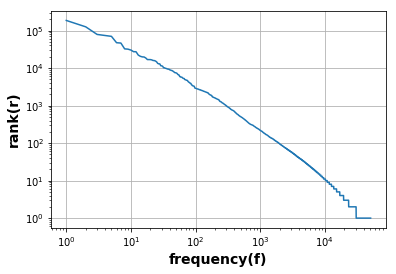

In [18]:
import matplotlib.pyplot as plt

# Count each token in each text of the Gutenberg collection
fd = FreqDist()
for text in gutenberg.fileids():
    for word in gutenberg.words(text):
        fd[word] += 1

# Initialize two empty lists which will hold our ranks and frequencies
ranks = []
freqs = []

# Generate a (rank, frequency) point for each counted token and 
# append to the respective lists. Note that the iteration
# over fd is automatically sorted.
for rank, (word, value) in enumerate(fd.most_common()):
    ranks.append(rank + 1)
    freqs.append(fd[word])

# Plot rank vs frequency on a log-log plot and show the plot
plt.loglog(ranks, freqs)
plt.xlabel('frequency(f)', fontsize=14, fontweight='bold')
plt.ylabel('rank(r)', fontsize=14, fontweight='bold')
plt.grid(True)

# Predicting Words

### Now that we have learnt how to explore a corpus, let’s define a task that can put such explorations to use.

### *Task*: Train and build a word predictor, i.e., given a training corpus, write a program that can predict the word that follows a given word. Use this predictor to generate a random sentence of 20 words.

### To build a word predictor, we first need to compute a distribution of two-word sequences over a training corpus, i.e., we need to keep count the occurrences of a word given the previous word as a context for that word. Once we have computed such a distribution, we can use the input word to find a list of all possible words that followed it in the training corpus and then output a word at random from this list. To generate a random sentence of 20 words, all we have to do is to start at the given word, predict the next word using this predictor, then the next and so on until we get a total of 20 words. The next set of cells illustrate how to accomplish this easily using the modules provided by NLTK. We use Jane Austen’s Persuasion as the training corpus.

In [19]:
from nltk import ConditionalFreqDist 
from random import choice

# Create conditional distribution object
cfd = ConditionalFreqDist() # we create an object out of class ConditionalFreqDist()

see http://www.nltk.org/_modules/nltk/probability.html

In [20]:
# For each token, count current word given previous word
prev_word = None
for word in gutenberg.words('austen-persuasion.txt'):
    cfd[prev_word][word] += 1
    prev_word = word

# Start predicting at the given word, say ’therefore’
word = 'foul'
i = 1

# Find all words that can possibly follow the current word and choose one at random
while i < 21: # keeps count, once we arrive at 20 words we end the loop
    print(word, end=" ")
    lwords = list(cfd[word].keys())
    follower = choice(lwords)
    word = follower
    i += 1

foul air than not think herself would think more exquisitely happy enough by side of furniture of illness of Henrietta 

### **Solution**: The 20 word output sentence is, of course, not grammatical but every two word sequence will be because the training corpus that we used for estimating our conditional frequency distribution is grammatical and because of the way that we estimated the conditional frequency distribu- tion. Note that for our task we used only the previous word as the context for our predictions. It is certainly possible to use the previous two or, even, three words as the prediction context.

# Discovering Part-Of-Speech Tags

### NLTK comes with an excellent set of modules to allow us to train and build relatively sophisticated POS taggers. However, for this task, we will restrict ourselves to a simple analysis on an already tagged corpus included with NLTK.

### **Task***: Tokenize the included Brown Corpus and build one or more suitable data structures so that you can answer the following questions:

### - What is the most frequent tag?

### - Which word has the most number of distinct tags?

### - What is the ratio of masculine to feminine pronouns?

### - How many words are ambiguous, in the sense that they appear with at least two tags ?

### For this task, it is important to note that there is are two versions of the Brown corpus that comes bundled with NLTK: the first is the raw corpus that we used in the last two tasks, and the second is a tagged version wherein each token of each sentence of the corpus has been annotated with the correct POS tags. Each sentence in this version of a corpus is represented as a list of 2-tuples, each of the form (token, tag). For example, a sentence like “the ball is green”, from a tagged corpus, will be represented inside NLTK as the list [('the','at'), ('ball','nn'), ('is',’vbz'), ('green','jj')] .

### As explained before, the Brown corpus comprises of 15 different sections, represented by the letters 'a' through 'r'. Each of the sections represents a different genre of text and for certain NLP tasks not discussed in this article, this division proves very useful. Given this information, all we should have to do is build the data structures to analyze this tagged corpus. Looking at the kinds of questions that we need to answer, it will be sufficient to build a frequency distribution over the POS tags and a conditional frequency distribution over the tags using the tokens as the context. The next set of cells illustrate the solution for the task.

In [34]:
from nltk.corpus import brown
from nltk import FreqDist, ConditionalFreqDist
fd = FreqDist() # we create an object of the class FreqDist
cfd = ConditionalFreqDist()

# for each tagged sentence in the corpus, get the (token, tag) pair and update
# both count(tag) and count(tag given token)
for sentence in brown.tagged_sents(): # tagged_sents is a fxn that already displays it as sentence, then gives a tag for each word in the sentence
    for (token, tag) in sentence: 
        fd[tag] += 1 # get the count of all tags in the sentence
        cfd[token][tag] += 1 # get count of how many times the word is tagged (ex. token = country, tag= 'nn', it counts how may times that the country was tagged as noun in the corpus)

# The most frequent tag is ...
fd.max() # search what is the max tag

'NN'

In [35]:
# Initialize a list to hold (numtags,word) tuple
wordbins = [] # bins holds number of frequency of the token/word, and word  

# append each (n(unique tags for token),token) tuple to list
for token in cfd.conditions(): # conditions allows you to loop over dictionary within dictionary
    wordbins.append((cfd[token].B(), token)) 

# sort tuples by number of unique tags (highest first)
wordbins.sort(reverse=True)

# the token with the maximum number of possible part-of-speech tags is ...
print(wordbins[0])

(12, 'that')


In [36]:
# masculine pronouns
male = ['he', 'his', 'him', 'himself']

# feminine pronouns
female = ['she', 'hers', 'her', 'herself']

# initialize counters
n_male, n_female = 0, 0

# total number of masculine samples
for m in male:
    n_male += cfd[m].N() # we get the pronoun in male list, and show the number of times this appears

# total number of feminine samples
for f in female:
    n_female += cfd[f].N() # we get the pronoun in female list, and show the number of times this appears

# calculate required ratio
print(float(n_male)/n_female)

3.2576884422110552


In [37]:
n_ambiguous = 0
for (ntags, token) in wordbins:
    if ntags > 1: 
        n_ambiguous += 1

# number of tokens with more than a single POS tag
print(n_ambiguous) # shows the number of words with more than one tag

8729


### **Solution**: The most frequent POS tag in the Brown corpus is, unsurprisingly, the noun (NN). The word that has the most number of unique tags is, in fact, the word that. There are almost 3 times as many masculine pronouns in the corpus as feminine pronouns and, finally, there are as many as 8700 words in the corpus that can be deemed ambiguous - a number that should indicate the difficulty of the POS-tagging task.

# Word Association

### The task of free word association is a very common one when it comes to psycholinguistics, especially in the context of lexical retrieval -- human subjects respond more readily to a word if it follows another highly associated word as opposed to a completely unrelated word. The instructions for performing the association are fairly straightforward -- the subject is asked for the word that immediately comes to mind upon hearing a particular word.

### **Task**: Use a large POS-tagged text corpus to perform free word association. You may ignore function words and assume that the words to be associated are always nouns.

### For this task, we will use the concept of word co-occurrences, i.e., counting the number of times words occur in close proximity with each other and then using these counts to estimate the degree of association. For each token in each sentence, we will look at all following tokens that lie within a fixed window and count their occurrences in this context using a con- ditional frequency distribution. The next set of cells show how we accomplish this using Python and NLTK with a window size of 5 and the POS-tagged version of the Brown corpus.

In [ ]:
#? 

In [57]:
from nltk.corpus import brown, stopwords

# initialize a new conditional distribution
cfd = ConditionalFreqDist()

# get a list of English stopwords
stopwords_list = stopwords.words('english')

def is_noun(tag): # we define a noun; noun is tagged as those below in red
    return tag.lower() in ['nn','nns','nn$','nn-tl','nn+bez', 'nn+hvz', 
                           'nns$','np','np$','np+bez','nps', 'nps$','nr',
                           'np-tl','nrs','nr$']

for sentence in brown.tagged_sents(): #
    for (index, tagtuple) in enumerate(sentence):
        (token, tag) = tagtuple # we take the tagtuple and split into the word (token) and then the tag
        token = token.lower()
        if token not in stopwords_list and is_noun(tag): # if the word is not in the stopword and it is a noun
            window = sentence[index+1:index+5] #we take the 5 words that come after it 
            for (window_token, window_tag) in window: # then the word in window
                window_token = window_token.lower() # we take the word in window to lower case
                if window_token not in stopwords_list and is_noun(window_tag): # then check if this word is not in the stopword and is a noun 
                    cfd[token][window_token] += 1 # then  

In [77]:
# OK. We are done ! Let's start associating !
print(cfd['america'].max())

god


In [72]:
print(cfd['franc'].max())

notes


In [41]:
print(cfd['man'].max())

woman


In [42]:
print(cfd['woman'].max())

world


In [43]:
print(cfd['boy'].max())

girl


In [44]:
print(cfd['girl'].max())

eyes


In [45]:
print(cfd['male'].max())

female


In [46]:
print(cfd['ball'].max())

player


In [47]:
print(cfd['doctor'].max())

bills


In [48]:
print(cfd['road'].max())

block


### The “word associator” that we have built seems to work surprisingly well, especially when compared to the minimal amount of effort that was required. (In fact, in the context of folk psychology, our associator would almost seem to have a personality, albeit a pessimistic and misogynistic one). The results of this task should be a clear indication of the usefulness of corpus linguistics in general. 